In [1]:
from IPython.lib.deepreload import original_import
%load_ext autoreload
%autoreload 2

from modular_ex4 import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PADDING=2
GRAYSCALE = False
STEP_SIZE = 16
BORDER_CUT = 15

garden_video = "Garden.mp4"
house_video = "House.mp4"
kessaria_video = "Kessaria.mp4"
boat_video = "boat.mp4"

# 1. Load & Stabilize
raw = load_video_frames(house_video)
stable = stabilize_video(raw, step_size=STEP_SIZE, border_cut=BORDER_CUT, enable_rotation=True)

In [3]:
# 2. Compute Path
matrices = compute_camera_path(stable, step_size=STEP_SIZE, border_cut=BORDER_CUT)
geo = compute_canvas_geometry(matrices, raw.shape[1], raw.shape[2])

In [5]:
# 3. Render
panorama_left = render_strip_panorama(stable, matrices, geo, strip_anchor=0.2, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Left Anchor 0.2 done.")
panorama_mid = render_strip_panorama(stable, matrices, geo, strip_anchor=0.5, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Mid Anchor 0.5 done.")
panorama_right = render_strip_panorama(stable, matrices, geo, strip_anchor=0.8, strip_padding=PADDING, grayscale_out=GRAYSCALE)
print("Panorama Right Anchor 0.8 done.")
print(">>> done.")

Panorama Left Anchor 0.2 done.
Panorama Mid Anchor 0.5 done.
Panorama Right Anchor 0.8 done.
>>> done.


initializing plot...


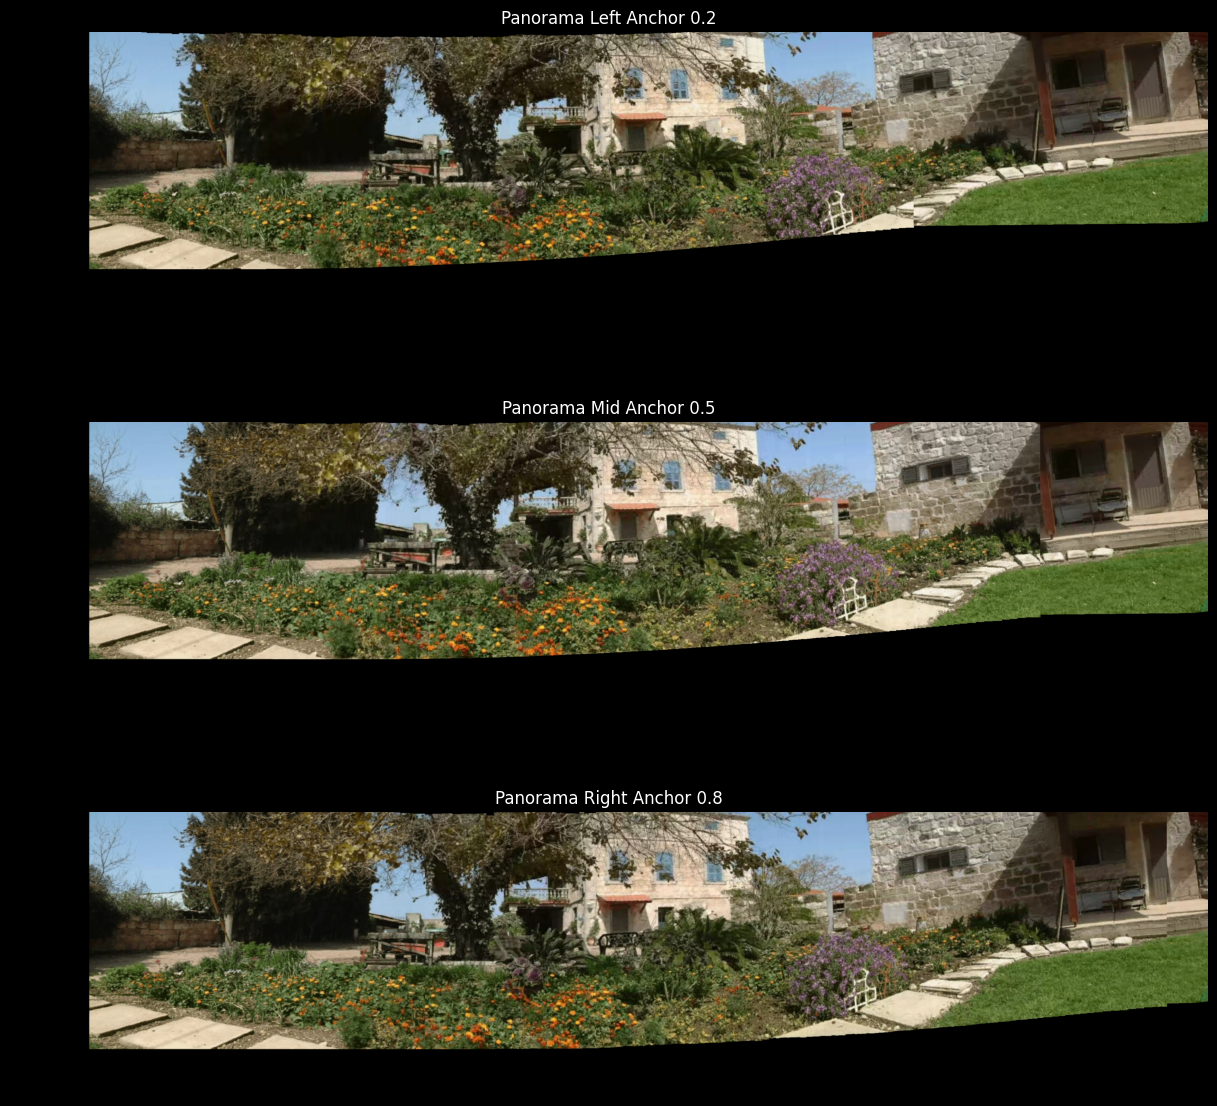

plot done.


In [15]:
# show all 3 panoramas one line below the other
# with tight layout, no vertical padding between lines
print("initializing plot...")
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.imshow(panorama_left)
plt.title("Panorama Left Anchor 0.2")
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(panorama_mid)
plt.title("Panorama Mid Anchor 0.5")
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(panorama_right)
plt.title("Panorama Right Anchor 0.8")
plt.axis('off')
plt.tight_layout(pad=0.1)
plt.show()
print("plot done.")

In [16]:
movie_frames = dynamic_mosaic(stable, matrices, geo)

Creating panorama for anchor 0.20...
Creating panorama for anchor 0.27...
Creating panorama for anchor 0.33...
Creating panorama for anchor 0.40...
Creating panorama for anchor 0.47...
Creating panorama for anchor 0.53...
Creating panorama for anchor 0.60...
Creating panorama for anchor 0.67...
Creating panorama for anchor 0.73...
Creating panorama for anchor 0.80...


In [17]:
import imageio

imageio.mimsave('outputs/house_parallax_movie.mp4', movie_frames, fps=10)
print("Movie saved!")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (3634, 862) to (3648, 864) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Movie saved!
